# Find similar images using CLIP embeddings

In this notebook you learn how to find similar images using the cosine similarity.

First, we'll get an understanding how the maths work using a basic example
Second, we'll calculatie the similarity between two images
Third, we'll find similar images from a set of images. 

### TO DO: Run the notebook and do the exercises

### Contents
1. Intro:  calculate the cosine similarity (nl: cosinusgelijkenis)
2. Calculate cosine similarity for 2 images
3. Find similar images with cosine similarity

### Sources
- https://nl.wikipedia.org/wiki/Cosinusgelijkenis
- https://openai.com/research/clip
- https://medium.com/@jeremy-k/unlocking-openai-clip-part-2-image-similarity-bf0224ab5bb0
- https://www.geeksforgeeks.org/how-to-calculate-cosine-similarity-in-python/
- https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/

## 1. Intro:  calculate the cosine similarity (nl: cosinusgelijkenis)

In [1]:
#Define two points

# Choose values [1-10] (integers/floats) to properly plot it below

# point 1
p1x = 4
p1y = 3

#point 2
p2x = 3
p2y = 4

In [2]:
#function to calculate cosine similarity
def cosine_similarity(a, b):
    dot_product = sum(x * y for x, y in zip(a, b))
    magnitude_a = sum(x * x for x in a) ** 0.5
    magnitude_b = sum(x * x for x in b) ** 0.5
    return dot_product / (magnitude_a * magnitude_b)

cosine_similarity((p1x,p1y), (p2x,p2y))

0.96

<IPython.core.display.Javascript object>


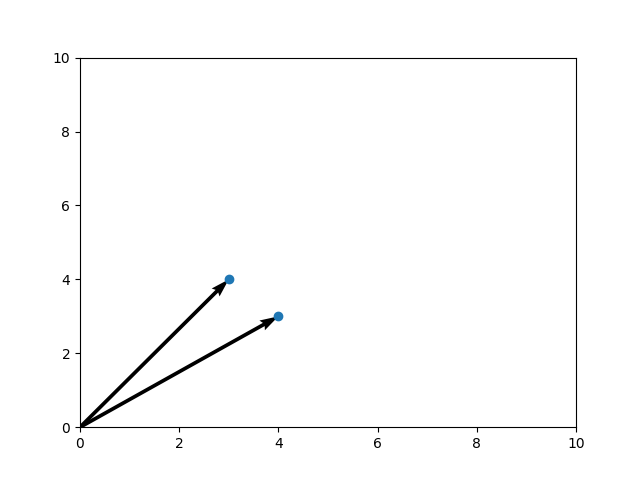

In [3]:
#plot the points and create a vector from 0,0
%matplotlib notebook
import matplotlib.pyplot as plt 

#get points and plot them
points_x = p1x, p2x
points_y = p1y, p2y
plt.plot(points_x, points_y, 'o') 

#plot vectors 
plt.quiver([0, 0], [0, 0], [p1x, p2x], [p1y,p2y], angles='xy', scale_units='xy', scale=1)

#plot axes and show it
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Exercise 1: 
1. play with the points and see what happens
2. create two examples:
    - Where cosine similarity is 1
    - Where cosine similarity is 0

## 2. Calculate cosine similarity for 2 images

In [2]:
# first install packages! Uncomment if necessary
%pip install torch torchvision
%pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 12.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 7.7 MB/s eta 0:00:0000:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", lin

Here we will use two images and calculate how similar they are. 

To do so we'll create embeddings using CLIP. CLIP has several ways of creating embeddings, but here we'll use a standard Vision Transformer (ViT).

In [1]:
# import packages
from PIL import Image
import torch
import torch.nn as nn
import clip

#check device
device = "cuda" if torch.cuda.is_available() else "cpu"

#select embedding model
model, preprocess = clip.load("ViT-B/32", device=device)

In [3]:
#select the two images you've download 
image1 = "car512.png"
image2= "car256.png"

In [4]:
#create embeddings for the images
image1_preprocess = preprocess(Image.open(image1)).unsqueeze(0).to(device)
image1_features = model.encode_image( image1_preprocess)

image2_preprocess = preprocess(Image.open(image2)).unsqueeze(0).to(device)
image2_features = model.encode_image( image2_preprocess)

### Exercise 2

Inspect the embeddings your created. 
Print it, the number of dimensions and the datatype

In [6]:
print(image1_features.ndim)
print(image1_features.dtype)
print(image1_features)

2
torch.float32
tensor([[-7.1295e-03,  3.0426e-01, -1.5102e-01,  6.6153e-02, -2.4930e-01,
          1.1151e-02, -6.1974e-03, -3.8706e-02, -6.3428e-02, -3.4938e-02,
          5.8075e-01,  7.7112e-02,  6.2573e-01,  2.4099e-01,  9.5018e-01,
          1.9665e-01,  4.6868e-01,  7.0838e-01,  5.3446e-01,  1.4568e-01,
          4.9104e-01,  1.2093e-01,  5.0233e-01, -1.8161e-01, -3.3989e-01,
         -2.3941e-02,  5.4024e-01, -2.1451e-01, -2.1125e-01,  1.8741e-02,
          1.3035e-01, -5.4253e-01,  1.1660e-01, -2.4580e-01, -2.4247e-01,
          2.9985e-01,  6.5374e-02,  4.0609e-01, -3.3253e-01,  8.6447e-01,
          1.9482e-01,  2.3015e-01, -8.6058e-02, -8.9725e-01,  2.5059e-01,
         -9.9057e-01,  3.2232e-01,  5.1526e-02,  1.0463e-01, -1.2702e-01,
         -1.5123e-01,  2.2074e-01,  1.4768e-01, -2.8227e-02, -2.1945e-01,
         -2.0820e-01,  2.7084e-01, -1.8058e-01, -4.6034e-01,  3.4892e-02,
          1.8762e-01, -6.2736e-01, -1.0412e-01,  1.1268e-01,  1.3669e-02,
         -4.3355e-01, 

In [7]:
#calculate the cosine similarity
cos = torch.nn.CosineSimilarity(dim=0)

similarity = cos(image1_features[0],image2_features[0]).item()
similarity = (similarity+1)/2

print("Image similarity: ", similarity)

Image similarity:  0.9919959902763367


Exercise 1: Reflect on what you just did...

<Replace with your comment>


## Find similar images with cosine similarity

In [1]:
import torch
import clip
from PIL import Image
import os
import itertools
import torch.nn as nn

#check your device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

#select the model for the embeddings. Here we use a Vision Transformer (ViT)
model, preprocess = clip.load("ViT-B/32", device=device)

#create a list of the given images
dataset_folder = './elephants/'
images = []
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith(('jpg','jpeg')):
            images.append(  root  + '/'+ file)


#Set the input image and create it's embedding
original_image = './elephants/11878674-indian-elephant.jpg'
input_image = preprocess(Image.open(original_image)).unsqueeze(0).to(device) #
input_image_features = model.encode_image(input_image)

# Create embeddings for other images, do similarity search and store in a python dictionary.
result = {}
for img in images:
    with torch.no_grad():
        image_preprocess = preprocess(Image.open(img)).unsqueeze(0).to(device)
        image_features = model.encode_image(image_preprocess)
        cos = torch.nn.CosineSimilarity(dim=0)
        sim = cos(image_features[0],input_image_features[0]).item()
        sim = (sim+1)/2
        result[img]=sim


#sort the results and print the top 3
sorted_value = sorted(result.items(), key=lambda x:x[1], reverse=True)
sorted_res = dict(sorted_value)
top_3 = dict(itertools.islice(sorted_res.items(), 3))
print(top_3)

cpu
{'./elephants//11878674-indian-elephant.jpg': 1.0, './elephants//7825284102_41d467d9f5_b.jpg': 0.9658060371875763, './elephants//elephant-2_1941432a.jpg': 0.9639252126216888}


The original image is:


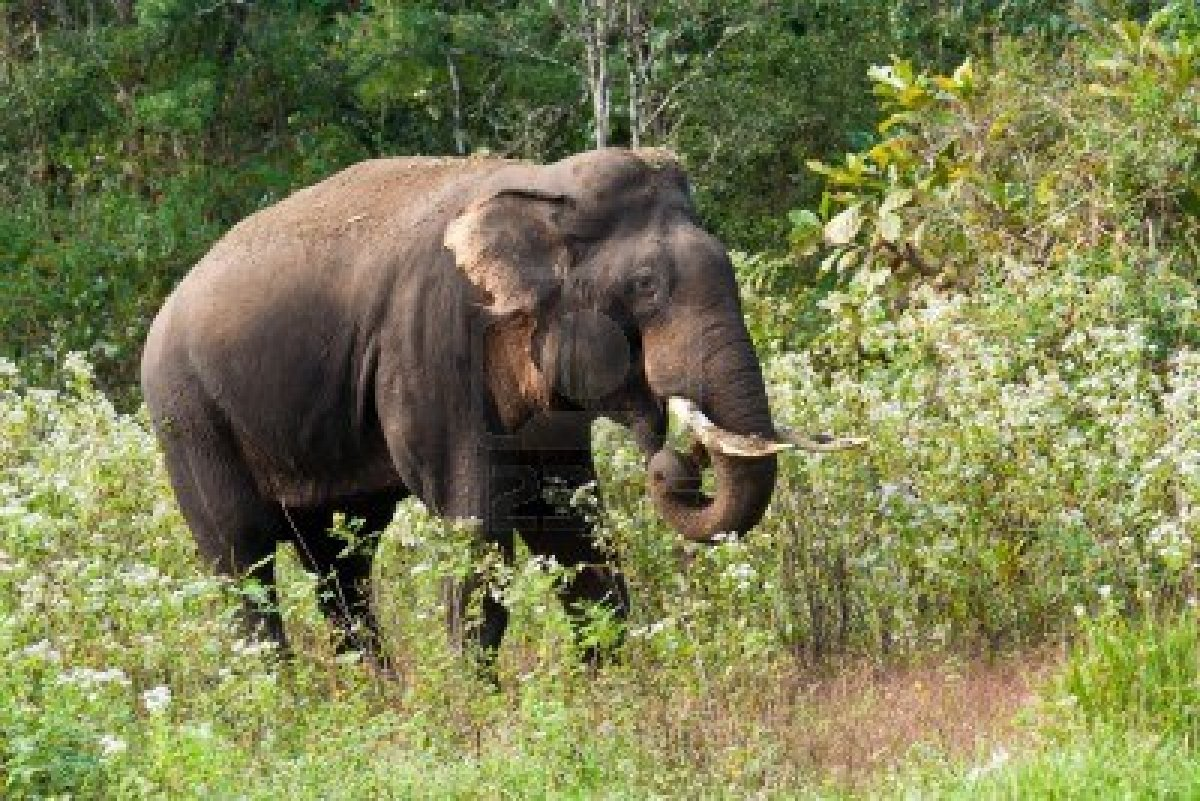

The duplicate is: 


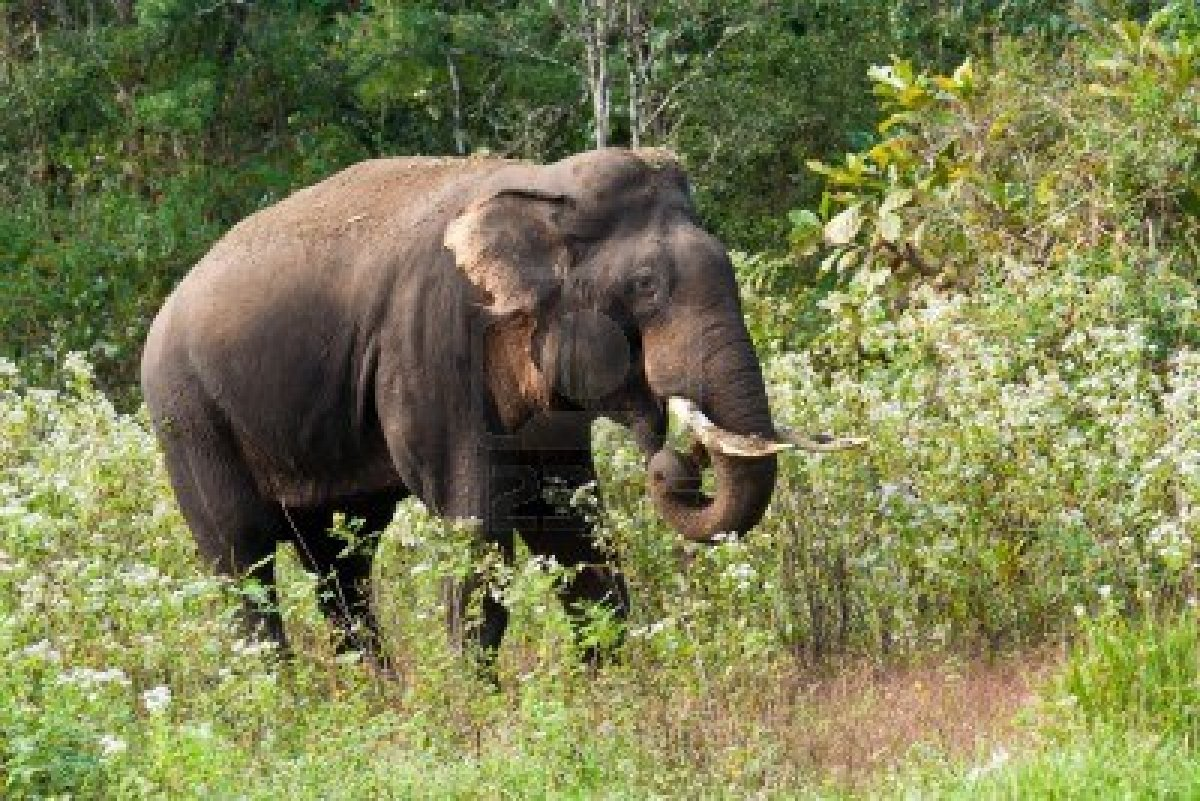

And the most similar images are:


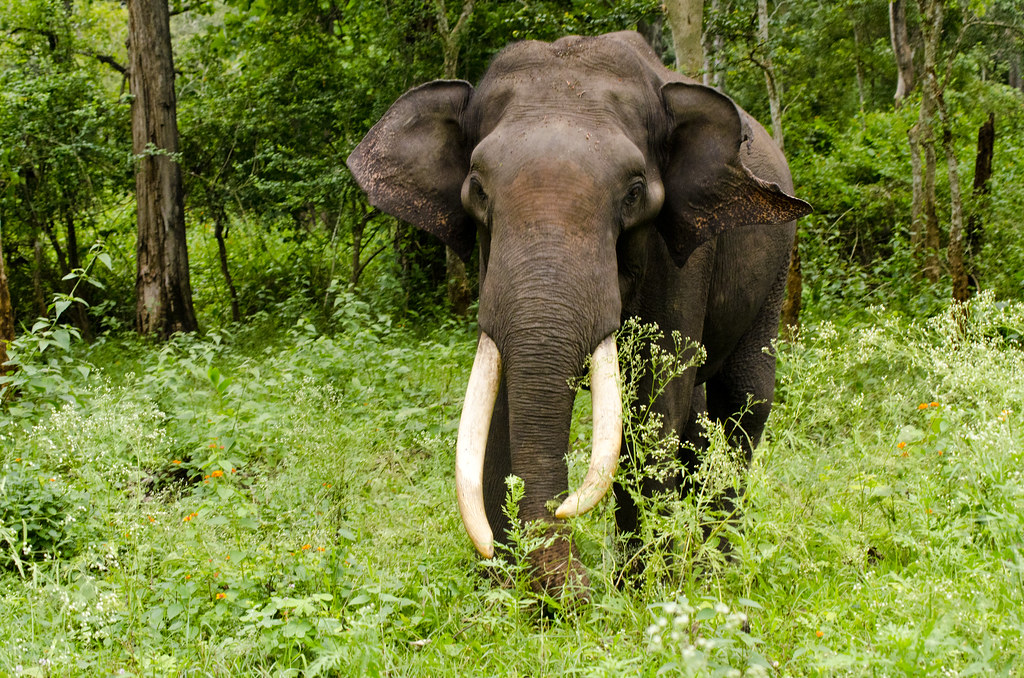

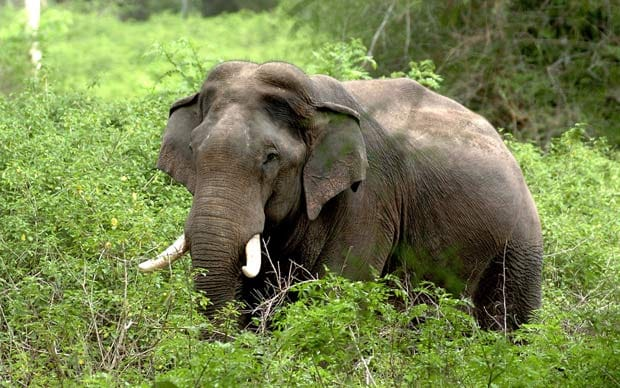

In [2]:
#display most similar images
from IPython.display import Image
from IPython.display import display

original_image = original_image
first = list(top_3.keys())[0]
second = list(top_3.keys())[1]
third = list(top_3.keys())[2]

#original image
img0 = Image(original_image, width = 400) 

#top 3
img1 = Image(first, width = 400) 
img2 = Image(second, width = 400) 
img3 = Image(third, width = 400)

print("The original image is:")
display(img0)
print('The duplicate is: ')
display(img1)
print('And the most similar images are:')
display(img2, img3)

### Exercise 3
Get the image that is least similar to the original image. 

In [18]:
# YOUR CODE HERE